Import all important stuff

In [1]:
import ssl

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from bertopic.representation import KeyBERTInspired
import pandas as pd
import nltk
from datetime import datetime
from textblob import TextBlob
from datasets import load_dataset

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import importlib
import functions
nltk.download('punkt_tab')

c:\Users\Jacob\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
from functions import *
importlib.reload(functions)


<module 'functions' from 'c:\\Users\\Jacob\\OneDrive\\uni\\MA WiSoz\\Semester III\\Computational Social Sciences\\foPra\\functions.py'>

Load all data 

In [3]:
parties = ["CDU", "SPD", "FDP", "AFD", "LEFT", "GREENS"]
file_path = "C:/Users/Jacob/OneDrive/uni/MA WiSoz/Semester III/Computational Social Sciences/foPra/data/"


In [4]:
# Load the DataFrame from a pickle file
df_manifesto = pd.read_pickle('Manifesto_final.pkl') 

In [5]:
cmp_categories = pd.read_csv(file_path  + "cmp_categories.csv")

In [6]:
#topic_model = BERTopic.load("bertopic_model.pkl")
topic_model = BERTopic.load(file_path[:-5])


In [7]:
tm_df = topic_model.get_topic_info()

In [ ]:
# tm_200 = topic_model.reduce_topics(df_manifesto["text"], nr_topics=200)
# tm_400 = topic_model.reduce_topics(df_manifesto["text"], nr_topics=400)


KeyboardInterrupt: 

In [ ]:
with open("topics_over_time.pkl", "rb") as f:
    topics_over_time = pickle.load(f)

In [8]:
# Load the topics from a pickle file
topics = pd.read_pickle('topics.pkl')

# Load the probabilities from a pickle file
probs = pd.read_pickle('probs.pkl')

#df_manifesto["topic"] = topics


In [9]:
economy = limit_to_cmp(df_manifesto, 400, 450)


Next: filter topics and codes to automatically code the topics.

In [11]:
topics_filter = get_topics(df_manifesto, cmp_categories)


In [12]:
list_topic_409 = topics_filter["Keynesian Demand Management"]
df_subset_409 = tm_df[tm_df['Topic'].isin(list_topic_409)]
df_subset_409

,Topic,Count,Name,Representation,Representative_Docs
0,-1,40769,-1_sozial_gesellschaft_sozialen_wirtschaftlich,"[sozial, gesellschaft, sozialen, wirtschaftlic...",NaN
1,0,2313,0_familienförderung_vereinbarkeit famili beruf...,"[familienförderung, vereinbarkeit famili beruf...",NaN
2,1,2048,1_steuergerechtigkeit_steuervergünstigungen_st...,"[steuergerechtigkeit, steuervergünstigungen, s...",NaN
3,2,1998,2_krankenversicherung_pflegeversicherung_geset...,"[krankenversicherung, pflegeversicherung, gese...",NaN
4,3,1698,3_demokraten_demokrati_demokratien_demokratisi...,"[demokraten, demokrati, demokratien, demokrati...",NaN
5,4,1685,4_kulturschaffenden_kultur_kulturellen_kulturn,"[kulturschaffenden, kultur, kulturellen, kultu...",NaN
8,7,1448,7_gleichberechtigung frauen männern_gleichstel...,"[gleichberechtigung frauen männern, gleichstel...",NaN
9,8,1258,8_sozial wohnungsbau_sozialen wohnungsbaus_soz...,"[sozial wohnungsbau, sozialen wohnungsbaus, so...",NaN
14,13,855,13_solid finanzen_finanzierungsvorbehalt_finan...,"[solid finanzen, finanzierungsvorbehalt, finan...",NaN
17,16,770,16_wissenschaftlerinnen wissenschaftl_wissensc...,"[wissenschaftlerinnen wissenschaftl, wissensch...",NaN


In [ ]:
extract_topics(self, topic_model, documents, c_tf_idf, topics)


SyntaxError: invalid character '¶' (U+00B6) (3095453334.py, line 1)

Inspect the data

In [14]:
topic_model.visualize_topics()

In [31]:
len(topic_model.get_topic(0))

10

Group and Compare Topics Across Parties
Your goal is to compare how political parties talk about different topics. You can:

Analyze topic distribution per party:

In [15]:
party_topic_counts = df_manifesto.groupby(["party", "topic"]).size().unstack().fillna(0)
party_topic_counts = party_topic_counts.div(df_manifesto.groupby("party")["party_count"].first(), axis=0)
party_topic_counts



topic,-1,0,1,2,3,4,5,6,7,8,...,148,149,150,151,152,153,154,155,156,157
party,,,,,,,,,,,,,,,,,,,,,
AFD,0.337195,0.039939,0.022256,0.027744,0.006402,0.023171,0.006402,0.039634,0.007317,0.010976,...,0.000000,0.000000,0.000000,0.000915,0.000610,0.000000,0.000000,0.000000,0.000000,0.001524
CDU,0.390549,0.027631,0.016917,0.015394,0.005695,0.014943,0.017762,0.013646,0.006992,0.009812,...,0.000620,0.002932,0.000282,0.000733,0.000169,0.000395,0.000846,0.000620,0.000113,0.000282
FDP,0.353124,0.016437,0.022606,0.013994,0.017348,0.014905,0.010765,0.009647,0.006707,0.008281,...,0.000290,0.000000,0.001449,0.000580,0.000497,0.000041,0.000331,0.000414,0.000290,0.001035
GREENS,0.386943,0.021612,0.015597,0.018085,0.012811,0.015262,0.016042,0.018902,0.022392,0.008875,...,0.000631,0.000000,0.000297,0.000520,0.000928,0.001225,0.000334,0.000631,0.000928,0.000334
LEFT,0.360793,0.014482,0.017093,0.025105,0.020891,0.015372,0.010030,0.015253,0.015550,0.023028,...,0.000534,0.000000,0.000119,0.000119,0.000356,0.000534,0.000356,0.000178,0.000712,0.000119
SPD,0.363975,0.022144,0.019877,0.018225,0.021719,0.014825,0.019924,0.009679,0.012890,0.010434,...,0.000614,0.000189,0.000236,0.000378,0.000283,0.000142,0.000708,0.000567,0.000283,0.000236


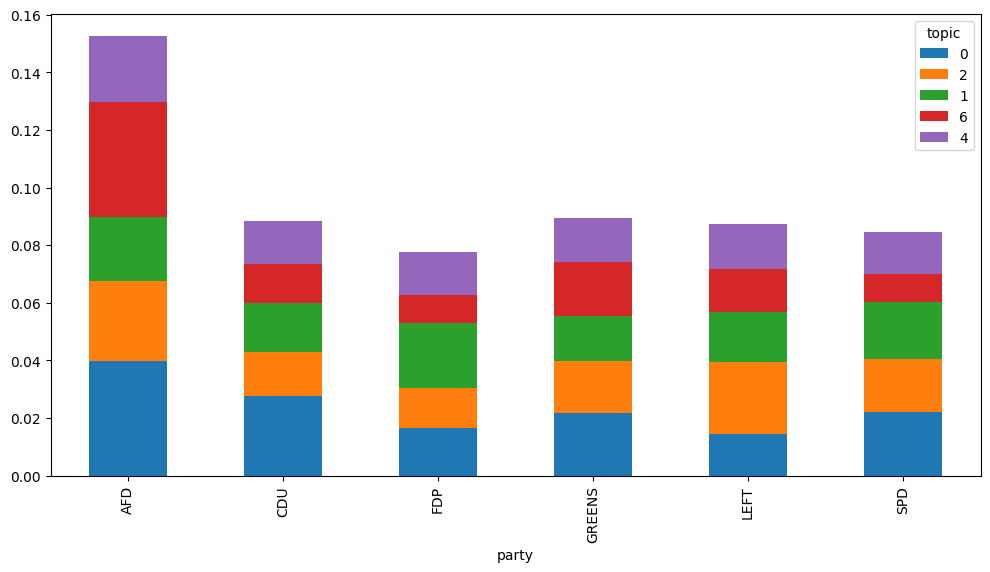

topic,0,2,1,6,4
party,,,,,
AFD,0.039939,0.027744,0.022256,0.039634,0.023171
CDU,0.027631,0.015394,0.016917,0.013646,0.014943
FDP,0.016437,0.013994,0.022606,0.009647,0.014905
GREENS,0.021612,0.018085,0.015597,0.018902,0.015262
LEFT,0.014482,0.025105,0.017093,0.015253,0.015372
SPD,0.022144,0.018225,0.019877,0.009679,0.014825


In [16]:
# Call the function
ptc_top3 = plot_top_topics(party_topic_counts, 5)
ptc_top3

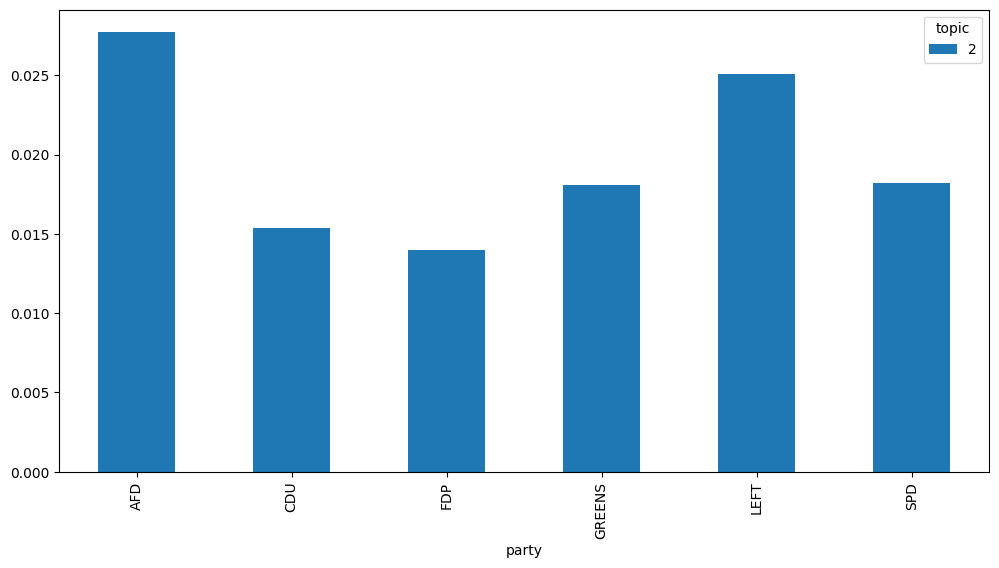

In [18]:
# Call the function with topic number 13
plot_topic_n_counts(party_topic_counts, 2)

Cluster topics into categories (e.g., Economy, Environment, Social Policy) using manual labeling or embeddings.

Analyze sentiment per topic & party (to see how parties frame topics differently):

- needs to be filtered for topic

In [20]:
df_manifesto["sentiment"] = df_manifesto["text"].apply(lambda x: TextBlob(x).sentiment.polarity)


KeyboardInterrupt: 

Visualize Topic Evolution
Overlay different parties on a timeline to compare their topic distributions.
Heatmaps to show intensity of topics across parties and time

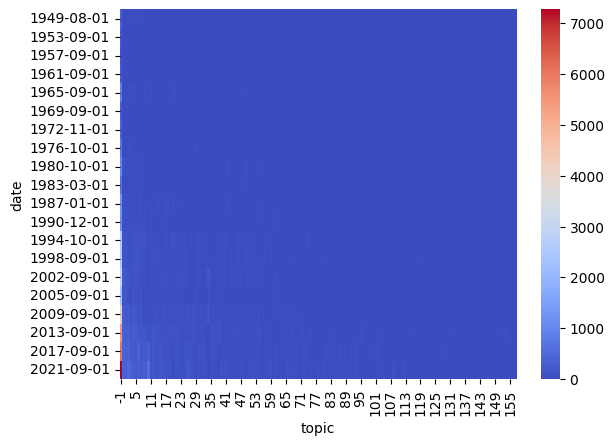

In [19]:
pivot = df_manifesto.pivot_table(index="date", columns="topic", values="party", aggfunc="count")
sns.heatmap(pivot.fillna(0), cmap="coolwarm")
plt.show()

In [ ]:
topics_docs =pd.DataFrame({"topic": topics, "documents": df_manifesto["text"]})

In [60]:
# Filter the topics_over_time DataFrame to include only the top 10 topics
top_10_topics = topics_over_time.groupby('Topic').size().nlargest(10).index
filtered_topics_over_time = topics_over_time[topics_over_time['Topic'].isin(top_10_topics)]

# Visualisiere die Themenentwicklung
topic_model.visualize_topics_over_time(topics_over_time , topics=[1,2,3,4,5,6,7,8,9,10]
)

In [65]:
topic_model.visualize_heatmap()


In [ ]:
representation_model = KeyBERTInspired()
topic_model = BERTopic(representation_model=representation_model)

In [ ]:

ssl._create_default_https_context = ssl._create_unverified_context


#docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']



topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df_manifesto["text"])
